In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix  

from sklearn import metrics

# Importing data frame and data cleanising¶

In [2]:
df1=pd.read_csv('train_kddcup.csv',header=None)
df2=pd.read_csv('test_kddcup.csv',header=None)
df=pd.concat([df1,df2])

In [3]:
df

0    1         2    3      4     5   6   7   8   9   ...    33    34  \
0       0  tcp  ftp_data   SF    491     0   0   0   0   0  ...  0.17  0.03   
1       0  udp     other   SF    146     0   0   0   0   0  ...  0.00  0.60   
2       0  tcp   private   S0      0     0   0   0   0   0  ...  0.10  0.05   
3       0  tcp      http   SF    232  8153   0   0   0   0  ...  1.00  0.00   
4       0  tcp      http   SF    199   420   0   0   0   0  ...  1.00  0.00   
...    ..  ...       ...  ...    ...   ...  ..  ..  ..  ..  ...   ...   ...   
22539   0  tcp      smtp   SF    794   333   0   0   0   0  ...  0.72  0.06   
22540   0  tcp      http   SF    317   938   0   0   0   0  ...  1.00  0.00   
22541   0  tcp      http   SF  54540  8314   0   0   0   2  ...  1.00  0.00   
22542   0  udp  domain_u   SF     42    42   0   0   0   0  ...  0.99  0.01   
22543   0  tcp    sunrpc  REJ      0     0   0   0   0   0  ...  0.08  0.03   

         35    36    37    38    39    40       41  42  
0      0.17  0.00  0.00  0.00  0.05  0.00   normal  20  
1      0.88  0.00  0.00  0.00  0.00  0.00   normal  15  
2      0.00  0.00  1.00  1.00  0.00  0.00  neptune  19  
3      0.03  0.04  0.03  0.01  0.00  0.01   normal  21  
4      0.00  0.00  0.00  0.00  0.00  0.00   normal  21  
...     ...   ...   ...   ...   ...   ...      ...  ..  
22539  0.01  0.01  0.01  0.00  0.00  0.00   normal  21  
22540  0.01  0.01  0.01  0.00  0.00  0.00   normal  21  
22541  0.00  0.00  0.00  0.00  0.07  0.07     back  15  
22542  0.00  0.00  0.00  0.00  0.00  0.00   normal  21  
22543  0.00  0.00  0.00  0.00  0.44  1.00    mscan  14  

[148517 rows x 43 columns]

In [4]:
df.head()

0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]

In [5]:
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','dummy','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_bushost_srv_rerror_rate']

In [6]:
df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...            0.17                0.03   
1               0       0    0  ...            0.00                0.60   
2               0       0    0  ...            0.10                0.05   
3               0       0    0  ...            1.00                0.00   
4               0       0    0  ...            1.00                0.00   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.00   
1                    0.88                    0.00   
2                    0.00                    0.00   
3                    0.03                    0.04   
4                    0.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         1.00                         1.00   
3                         0.03                         0.01   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.05                      0.00                normal   
1                  0.00                      0.00                normal   
2                  0.00                      0.00               neptune   
3                  0.00                      0.01                normal   
4                  0.00                      0.00                normal   

   dst_bushost_srv_rerror_rate  
0                           20  
1                           15  
2                           19  
3                           21  
4                           21  

[5 rows x 43 columns]

In [7]:
df.shape

(148517, 43)

In [8]:
df=df.drop(['wrong_fragment','urgent','num_failed_logins','num_file_creations','num_shells','dummy','num_outbound_cmds'],axis=1)

In [9]:
df.shape

(148517, 36)

In [10]:
df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  hot  \
0         0           tcp  ftp_data   SF        491          0     0    0   
1         0           udp     other   SF        146          0     0    0   
2         0           tcp   private   S0          0          0     0    0   
3         0           tcp      http   SF        232       8153     0    0   
4         0           tcp      http   SF        199        420     0    0   

   logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0          0                0  ...            0.17                0.03   
1          0                0  ...            0.00                0.60   
2          0                0  ...            0.10                0.05   
3          1                0  ...            1.00                0.00   
4          1                0  ...            1.00                0.00   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.00   
1                    0.88                    0.00   
2                    0.00                    0.00   
3                    0.03                    0.04   
4                    0.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         1.00                         1.00   
3                         0.03                         0.01   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.05                      0.00                normal   
1                  0.00                      0.00                normal   
2                  0.00                      0.00               neptune   
3                  0.00                      0.01                normal   
4                  0.00                      0.00                normal   

   dst_bushost_srv_rerror_rate  
0                           20  
1                           15  
2                           19  
3                           21  
4                           21  

[5 rows x 36 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   hot                          148517 non-null  int64  
 8   logged_in                    148517 non-null  int64  
 9   num_compromised              148517 non-null  int64  
 10  root_shell                   148517 non-null  int64  
 11  su_attempted                 148517 non-null  int64  
 12  num_root                     148517 non-null  int64  
 13  

In [12]:
df.describe()

duration     src_bytes     dst_bytes           land  \
count  148517.000000  1.485170e+05  1.485170e+05  148517.000000   
mean      276.779305  4.022795e+04  1.708885e+04       0.000215   
std      2460.683131  5.409612e+06  3.703525e+06       0.014677   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.780000e+02  5.710000e+02       0.000000   
max     57715.000000  1.379964e+09  1.309937e+09       1.000000   

                 hot      logged_in  num_compromised     root_shell  \
count  148517.000000  148517.000000    148517.000000  148517.000000   
mean        0.189379       0.402789         0.255062       0.001508   
std         2.013160       0.490461        22.231375       0.038807   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.000000         0.000000       0.000000   
50%         0.000000       0.000000         0.000000       0.000000   
75%         0.000000       1.000000         0.000000       0.000000   
max       101.000000       1.000000      7479.000000       1.000000   

        su_attempted       num_root  ...  srv_diff_host_rate  dst_host_count  \
count  148517.000000  148517.000000  ...       148517.000000   148517.000000   
mean        0.000976       0.273726  ...          119.462661        0.534521   
std         0.042389      22.689023  ...          111.232318        0.448061   
min         0.000000       0.000000  ...            0.000000        0.000000   
25%         0.000000       0.000000  ...           11.000000        0.050000   
50%         0.000000       0.000000  ...           72.000000        0.600000   
75%         0.000000       0.000000  ...          255.000000        1.000000   
max         2.000000    7468.000000  ...          255.000000        1.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       148517.000000           148517.000000           148517.000000   
mean             0.084103                0.145932                0.030584   
std              0.194102                0.308638                0.108975   
min              0.000000                0.000000                0.000000   
25%              0.000000                0.000000                0.000000   
50%              0.020000                0.000000                0.000000   
75%              0.070000                0.050000                0.010000   
max              1.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                148517.000000                148517.000000   
mean                      0.256122                     0.251304   
std                       0.428500                     0.429719   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.600000                     0.500000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  \
count         148517.000000             148517.000000   
mean               0.136220                  0.136397   
std                0.322741                  0.335282   
min                0.000000                  0.000000   
25%                0.000000                  0.000000   
50%                0.000000                  0.000000   
75%                0.000000                  0.000000   
max                1.000000                  1.000000   

       dst_bushost_srv_rerror_rate  
count                148517.000000  
mean                     19.278480  
std                       2.739757  
min                       0.000000  
25%                      18.000000  
50%          

In [13]:
df.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'hot', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_bushost_srv_rerror_rate'],
      dtype=object)

Data Preprocessing

In [14]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
hot                            0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_s

In [15]:
df.duplicated(keep='first').sum()

610

In [16]:
df=df.drop_duplicates()

In [17]:
df.duplicated(keep='first').sum()

0

<AxesSubplot:>

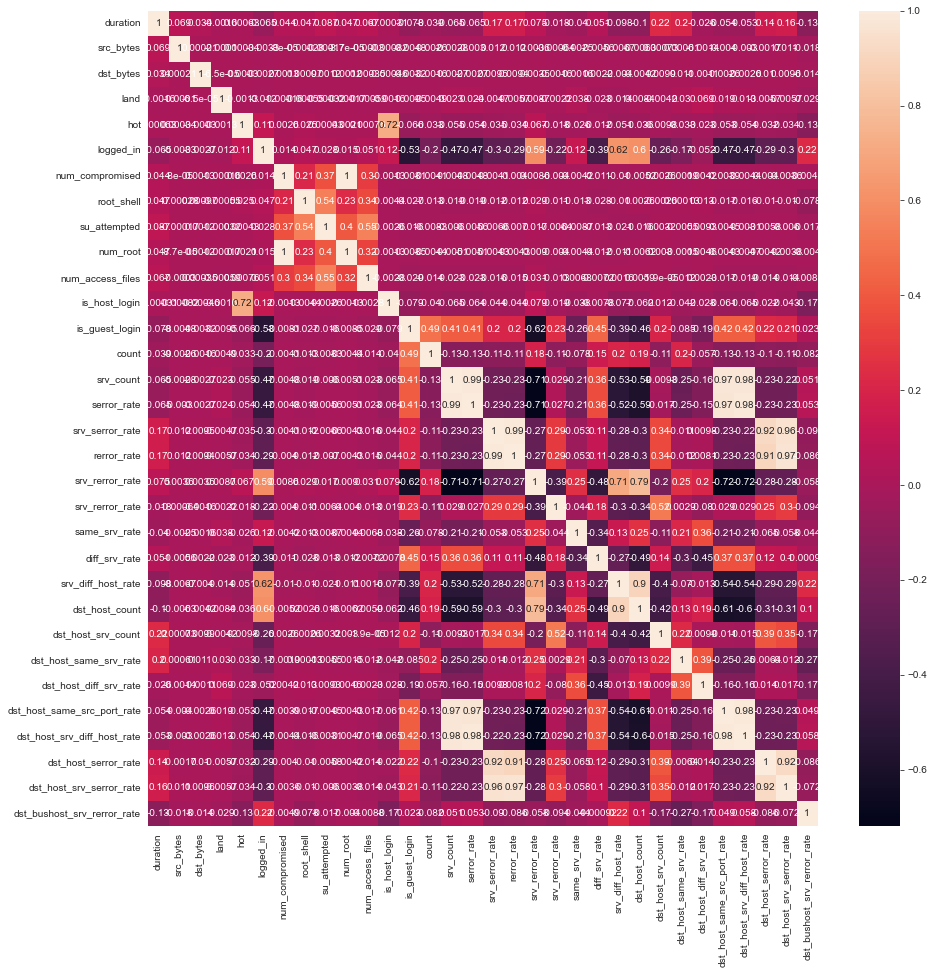

In [18]:
corr_map=df.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

In [19]:
df['protocol_type'].value_counts()

tcp     121361
udp      17541
icmp      9005
Name: protocol_type, dtype: int64

In [20]:
df['service'].value_counts()

http         48168
private      26474
domain_u      9881
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [21]:
df['flag'].value_counts()

SF        89394
S0        36808
REJ       14970
RSTR       3082
RSTO       2329
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          49
Name: flag, dtype: int64

In [22]:
df['dst_host_rerror_rate'].value_counts()

normal             76967
neptune            45716
satan               4360
ipsweep             3643
smurf               3108
portsweep           3070
nmap                1566
back                1300
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             901
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  221
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
rootkit               23
land                  22
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


# Data Transormation

In [23]:
protocol_type = {'tcp' : 0,'udp' : 1,'icmp' : 2}
protocol_type.items()

dict_items([('tcp', 0), ('udp', 1), ('icmp', 2)])

In [24]:
df.protocol_type = [protocol_type[item] for item in df.protocol_type]

In [25]:
df.head(20)

duration  protocol_type     service flag  src_bytes  dst_bytes  land  hot  \
0          0              0    ftp_data   SF        491          0     0    0   
1          0              1       other   SF        146          0     0    0   
2          0              0     private   S0          0          0     0    0   
3          0              0        http   SF        232       8153     0    0   
4          0              0        http   SF        199        420     0    0   
5          0              0     private  REJ          0          0     0    0   
6          0              0     private   S0          0          0     0    0   
7          0              0     private   S0          0          0     0    0   
8          0              0  remote_job   S0          0          0     0    0   
9          0              0     private   S0          0          0     0    0   
10         0              0     private  REJ          0          0     0    0   
11         0              0     private   S0          0          0     0    0   
12         0              0        http   SF        287       2251     0    0   
13         0              0    ftp_data   SF        334          0     0    0   
14         0              0        name   S0          0          0     0    0   
15         0              0  netbios_ns   S0          0          0     0    0   
16         0              0        http   SF        300      13788     0    0   
17         0              2       eco_i   SF         18          0     0    0   
18         0              0        http   SF        233        616     0    0   
19         0              0        http   SF        343       1178     0    0   

    logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0           0                0  ...            0.17                0.03   
1           0                0  ...            0.00                0.60   
2           0                0  ...            0.10                0.05   
3           1                0  ...            1.00                0.00   
4           1                0  ...            1.00                0.00   
5           0                0  ...            0.07                0.07   
6           0                0  ...            0.04                0.05   
7           0                0  ...            0.06                0.07   
8           0                0  ...            0.09                0.05   
9           0                0  ...            0.05                0.06   
10          0                0  ...            0.05                0.07   
11          0                0  ...            0.05                0.07   
12          1                0  ...            1.00                0.00   
13          1                0  ...            1.00                0.00   
14          0                0  ...            0.00                0.07   
15          0                0  ...            0.01                0.06   
16          1                0  ...            1.00                0.00   
17          0                0  ...            1.00                0.00   
18          1                0  ...            1.00                0.00   
19          1                0  ...            1.00                0.00   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.00   
1                     0.88                    0.00   
2                     0.00                    0.00   
3                     0.03                    0.04   
4                     0.00                    0.00   
5                     0.00                    0.00   
6                     0.00                    0.00   
7                     0.00                    0.00   
8                     0.00                    0.00   
9                     0.00                    0.00   
10                    0.00                    0.00   
11                    0.00                    0.00   
12                    0.

In [26]:
duration =df['duration']

for i in duration:
    if i <= 2:
        print('good condition', i)
    else:        
        print('bad condition', i)

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5607
good condition 0
bad condition 507
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
bad condition 9052
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 475
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5065
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1985
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9114
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
bad condition 24
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 22
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2670
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3660
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 407
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
bad condition 29053
good condition 0
good condition 0
good condition 0
bad condition 6707
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8649
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4629
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2355
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5066
good condition 0
good condition 0
good condition 0
bad condition 32
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
bad condition 244
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10332
bad condition 2650
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 37370
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1574
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5041
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
bad condition 27
good condition 0
bad condition 4
bad condition 190
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 18888
good condition 0
bad condition 13
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
bad condition 9305
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2165
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13904
good condition 0
bad condition 16941
good condition 0
good condition 0
bad condition 35240
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8655
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
bad condition 5
good

good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 42260
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 32
good condition 0
good condition

good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 378
good condition 0
bad condition 3
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12773
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 29
good condition 0
good condition 2
good condition 0
good condition 0
bad condition 6531
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 32
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 11
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 21767
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7976
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2713
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4345
good condit

good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 

good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 500
good condition 0
bad condition 1530
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 16553
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4115
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5042
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 41
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2976
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 42470
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
bad condition 41476
bad condition 29
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7009
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26588
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

bad condition 6070
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 30418
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 20
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 14462
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5042
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 14
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15122
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 1
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 347
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4374
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30057
good condition 0
good condition 0
bad condition 1774
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good co

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 24
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31361
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3392
good condition 0
good condition 0
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15127
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 555
good condition 0
good condition 0
good condition 0
good c

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2159
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1605
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 32
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 688
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12169
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13221
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 11
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26728
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
bad condition 2630
good condition 0
good condition 0
good condition 1
bad condition 3
good condition 1
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condi

good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13836
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13812
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 308
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
bad condition 26883
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4270
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12653
good condition 0
good condition 0
bad condition 26
bad condition 5605
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 36204
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2470
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4848
good condition 0
go

bad condition 9
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1016
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 658
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 14
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 38621
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5083
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0


good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27161
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4050
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2230
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12471
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5044
good condition 0
good condition 0
good condition 0
bad

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12546
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
bad condition 1105
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 14
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 18298
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
bad condition 7591
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2311
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
bad condition 5647
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
bad condition 217
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2350
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5791
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 16125
good condition 0
good condition 0
good condition 0
bad condition 2630
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 38890
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good c

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4741
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad conditio

bad condition 143
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2469
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
bad condition 27
good condition 0
bad condition 4564
good cond

good condition 0
bad condition 37770
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
bad condition 3
bad condition 1390
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 91
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1480
bad condition 1619
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2676
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
bad condition 42
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 36323
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 172
bad condition 11711
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 16
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5149
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5100
good condition 0
good condition 0
bad condition 26888
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 427
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
bad condition 38679
good condit

bad condition 4
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 177
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 107
good condition 0
good condition 0
good condition 0
good condition

good condition 0
bad condition 169
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1298
good condition 0
bad condition 897
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
bad condition 12990
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5047
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31381
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6195
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
bad condition 4055
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1864
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 493
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 38911
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 41431
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8032
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good co

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8935
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 633
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7781
bad condition 23
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 17539
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 34
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 5406
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4304
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1365
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
bad condition 13193
good condition 0
good condition 0
good condition 0
bad condition 40491
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5090
good condition 0
good condition 0
good condition 0
bad condition 17
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 1
good condition 0
good condition 0
good condition 0
bad condition 2717
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6869
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 46
good condition 0
good condition 0
good condition 0
bad condition 37648
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26050
good conditi

bad condition 10485
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4190
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10999
good condition 0
bad condition 160
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 16
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 13
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
bad condition 32
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0

good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 21
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 3
good condition 0


good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2055
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 1
good condition 0
good condition 0
good condition 0
good condition 1
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26
good condition 0
bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10397
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
bad condition 14
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6

good condition 2
bad condition 31321
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 223
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2145
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 155
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 22
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 23
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1433
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
bad condition 43
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 14198
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 19
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5054
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6350
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 1
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 18018
good condition 0
bad condition 59
good condition 0
good condition 0
good condition 0
bad condition 2630
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condit

bad condition 8
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
bad condition 39930
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
bad condition 14118
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
bad condition 38
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 42
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 11654
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0

good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 94
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1193
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 29
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7969
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2395
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 10
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2295
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 22027
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2587
good condition 0
good condition 0
good co

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2620
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
bad condition 3324
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
bad condition 31521
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1824
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 719
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5394
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 32
bad condition 5057
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 36
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3214
good condition 1
good condition 0
bad condition 4954
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9055
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 11045
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2628
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10485
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good co

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 632
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 96
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5990
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2638
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

bad condition 16
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4013
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 21
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 17
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 37416
good condition 0
good condition 2
bad condition 20
good condition 0
good condition 0
good condition 0
bad condition 5353
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

bad condition 7210
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4729
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 24
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

bad condition 5
good condition 0
bad condition 29
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2620
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 16045
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12965
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31194
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1326
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 249
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1105
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 39
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 95
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10354
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 40543
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 69
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
bad condition 31
good condition 0
good condition 2
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30735
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
bad condition 15163
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 364
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 1
good condition 0
bad condition 32
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3784
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7055
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0

good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2928
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 16
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
bad condition 21283
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4888
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26191
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

bad condition 28
good condition 0
bad condition 855
good condition 0
bad condition 4060
good condition 0
good condition 0
bad condition 32
good condition 0
good condition 1
good condition 0
bad condition 24
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 2594
good condition 0
good condition 0
bad condition 16
good condition 0
good condition 0
good condition 0
bad condition 95
bad condition 795
good condition 0
good condition 0
good condition 0
bad condition 10178
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good cond

bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 17
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 1
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 21541
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
bad condition 1531
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 39487
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1174
good condition 0
good condition 0
good condition 0
good condition 0
good condit

bad condition 5066
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9732
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3915
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10127
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 1955
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 48
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 42888
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 39133
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8435
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 388
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 17
good condit

good condition 0
bad condition 32
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27850
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6984
bad condition 22
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 31
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3038
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 40883
good cond

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 120
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7800
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 356
good condi

bad condition 339
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 27790
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4175
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2030
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26387
good condition 0
good condition 0
good condition 0
bad condition 7
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12114
good condition 1
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
bad condition 9254
good condition 1
good condition 0
bad condition 24
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 40963
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good co

good condition 0
good condition 0
bad condition 23080
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2053
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
bad condit

bad condition 21143
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 26
good condition 0
good condition 0
bad condition 319
good condition 0
bad condition 2625
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
bad condition 6650
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
bad condition 593
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 15
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5419
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 296
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 25
good condition 0
good condition 0

good condition 0
good condition 1
good condition 0
bad condition 5
good condition 1
good condition 0
good condition 0
bad condition 910
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 1842
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 412
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 31885
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

bad condition 3
good condition 0
good condition 0
bad condition 2638
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 9080
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 12893
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 420
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 30
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

bad condition 36873
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 21
good condition 0
good condition 0
bad condition 42804
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9335
good condition 0
bad condition 3
good conditio

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 283
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 899
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good conditi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7541
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
bad condition 801
good condition 0
good condition 0
good condition 0
bad condition 280
good condition 0
good condition 0
good condition 1
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 84
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7863
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good cond

good condition 0
bad condition 4
good condition 0
bad condition 282
good condition 0
bad condition 7473
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
bad condition 9
good condition 0
bad condition 5
bad condition 281
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7434
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7310
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

good condition 0
bad condition 184
good condition 0
good condition 0
bad condition 281
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 904
good condition 0
good condition 0
good condition 0
bad condition 8160
good condition 0
bad condition 1016
bad condition 7611
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7260
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
bad c

good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 4
bad condition 3
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
bad condition 4
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7566
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 40
good condition 0
good condition 0
bad condition 8100
bad condition 7228
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8112
good condition 0
good condition 0
bad condition 806
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2075
good condition 0
bad condition 283
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4928
good condition 0
good condition 0
bad condi

good condition 1
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
bad condition 280
good condition 0
good condition 0
bad condition 284
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
bad condition 7579
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2077
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
bad condition 7306
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 812
bad condition 7268
good condition 0
bad co

good condition 0
bad condition 281
bad condition 4
good condition 0
good condition 0
bad condition 7646
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7350
bad condition 20
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 23
good condition 0
good condition 0
bad condition 896
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condit

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8019
bad condition 91
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7234
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 906
good condition 0
bad condition 4
good condition 0
good condition 0
bad condition 284
good condition 0
good condition 0
bad condition 35
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7493
good condition 0
good condition 0
bad condition 7450
good condition 0
good condition 0
good condition 0
good condition 2
good 

bad condition 8224
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
bad condition 805
good condition 2
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
bad condition 280
good condition 2
good condition 0
good condition 0
good condition 0
bad condition 280
good condition 0
good condition 0
good condition 0
good condit

good condition 0
bad condition 8172
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 813
bad condition 1019
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 154
good condition 0
bad condition 4
good condition 2
good condition 0
good condition 0
good condition 0
bad condition 26
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 799
good condition 0
good condition 0
good condition 0
good condition 0
good condi

bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7867
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
bad condition 2058
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0

good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 280
good condition 0

good condition 0
bad condition 8068
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 2060
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
bad condition 795
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
bad condition 280
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 107
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 903
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8579
good condition 0
bad condition 896
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 899
good condition 0
bad condition 7541
good condition 0
good condition 0
bad condition 7390
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 18
good condition 0
good condition 0
good condition 0
good

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 916
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
good condition 0
bad condition 28
good condition 0
bad condition 7625
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 284
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 6
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good cond

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
bad condition 280
good condition 0
bad condition 718
good condition 0
bad condition 281
good condition 0
good condition 0
bad condition 282
bad condition 5
good condition 0
good condition 0
bad condition 7258
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7298
good condition 0
good condition 1
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8048
good condition 0
bad condition 280
good condition 0
good condition 0
good condition 0
bad condition 8132
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 908
good c

good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
bad condition 30
good condition 1
bad condition 7558
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 796
bad condition 14
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 2
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 898
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
bad condition 2067
bad condition 15
good condition 0
good condition 0
good condition 0
bad condition 814
bad condition 6
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
bad condition 11675
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good cond

bad condition 3
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition

good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7366
bad condition 7336
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 280
good condition 0
bad condition 280
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7645
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good con

bad condition 280
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7254
bad condition 3
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7322
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 283
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 9
good condition 0
good condition 0
bad condition 798
good cond

bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 284
good condition 0
good condition 0
good condition 0
bad condition 7410
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 5
good condition 0
bad condition 281
good condition 0
good condition 0
bad condition 280
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 10
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 8189
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
bad condition 283
good condition 0
good condition 0
good condition 0
good c

bad condition 4
bad condition 7434
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
bad condition 8108
good condition 0
good condition 0
good condition 0
good condition 0
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 280
bad condition 4
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7216
good condition 0
good condition 0
bad condition 4
good conditi

good condition 1
good condition 0
good condition 0
bad condition 4
bad condition 282
good condition 0
good condition 1
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 942
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 280
good condition 0
good condition 0
bad condition 281
bad condition 4
bad condition 5
good condition 0
good condition 0
bad condition 896
good condition 1
good condition 0
bad condition 282
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7384
good condition 1
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 7273
bad condition 4
good condition 0
bad condition 280
bad condition 8120
good condition 0
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good co

bad condition 282
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
bad condition 7477
good condition 0
good condition 0
bad condition 4
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 283
good condition 0
good condition 0
good condition 0
good condition 0
bad condition 281
good condition 0
good condition 0
bad condition 5
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condition 0
good condi

In [27]:
df['duration'] = np.where((df.duration <= 2), 0, 1)

In [28]:
df.head(20)

duration  protocol_type     service flag  src_bytes  dst_bytes  land  hot  \
0          0              0    ftp_data   SF        491          0     0    0   
1          0              1       other   SF        146          0     0    0   
2          0              0     private   S0          0          0     0    0   
3          0              0        http   SF        232       8153     0    0   
4          0              0        http   SF        199        420     0    0   
5          0              0     private  REJ          0          0     0    0   
6          0              0     private   S0          0          0     0    0   
7          0              0     private   S0          0          0     0    0   
8          0              0  remote_job   S0          0          0     0    0   
9          0              0     private   S0          0          0     0    0   
10         0              0     private  REJ          0          0     0    0   
11         0              0     private   S0          0          0     0    0   
12         0              0        http   SF        287       2251     0    0   
13         0              0    ftp_data   SF        334          0     0    0   
14         0              0        name   S0          0          0     0    0   
15         0              0  netbios_ns   S0          0          0     0    0   
16         0              0        http   SF        300      13788     0    0   
17         0              2       eco_i   SF         18          0     0    0   
18         0              0        http   SF        233        616     0    0   
19         0              0        http   SF        343       1178     0    0   

    logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0           0                0  ...            0.17                0.03   
1           0                0  ...            0.00                0.60   
2           0                0  ...            0.10                0.05   
3           1                0  ...            1.00                0.00   
4           1                0  ...            1.00                0.00   
5           0                0  ...            0.07                0.07   
6           0                0  ...            0.04                0.05   
7           0                0  ...            0.06                0.07   
8           0                0  ...            0.09                0.05   
9           0                0  ...            0.05                0.06   
10          0                0  ...            0.05                0.07   
11          0                0  ...            0.05                0.07   
12          1                0  ...            1.00                0.00   
13          1                0  ...            1.00                0.00   
14          0                0  ...            0.00                0.07   
15          0                0  ...            0.01                0.06   
16          1                0  ...            1.00                0.00   
17          0                0  ...            1.00                0.00   
18          1                0  ...            1.00                0.00   
19          1                0  ...            1.00                0.00   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.00   
1                     0.88                    0.00   
2                     0.00                    0.00   
3                     0.03                    0.04   
4                     0.00                    0.00   
5                     0.00                    0.00   
6                     0.00                    0.00   
7                     0.00                    0.00   
8                     0.00                    0.00   
9                     0.00                    0.00   
10                    0.00                    0.00   
11                    0.00                    0.00   
12                    0.

In [29]:
replace_map = {'normal' : "normal" , 'DOS' : ['back', 'land', 'pod', 'neptune', 'smurf', 'teardrop'], 'R2L' : ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'spy', 'phf', 'warezclient', 'warezmaster'], 'U2R' : ['buffer_overflow', 'loadmodule', 'perl', 'rootkit'], 'PROBE' : ['ipsweep', 'nmap', 'portsweep', 'satan'], 'extra new attacks' : ['apache2', 'httptunnel', 'mailbomb', 'mscan', 'named', 'processtable', 'ps', 'saint', 'sendmail', 'snmpgetattack', 'snmpguess', 'sqlattack', 'udpstorm', 'worm', 'xlock', 'xsnoop', 'xterm']}

In [30]:
df= df.assign(dst_host_rerror_rate = df['dst_host_rerror_rate'].apply(lambda x: [key for key, value in replace_map.items() if x in value][0]))

In [31]:
df.head(20)

duration  protocol_type     service flag  src_bytes  dst_bytes  land  hot  \
0          0              0    ftp_data   SF        491          0     0    0   
1          0              1       other   SF        146          0     0    0   
2          0              0     private   S0          0          0     0    0   
3          0              0        http   SF        232       8153     0    0   
4          0              0        http   SF        199        420     0    0   
5          0              0     private  REJ          0          0     0    0   
6          0              0     private   S0          0          0     0    0   
7          0              0     private   S0          0          0     0    0   
8          0              0  remote_job   S0          0          0     0    0   
9          0              0     private   S0          0          0     0    0   
10         0              0     private  REJ          0          0     0    0   
11         0              0     private   S0          0          0     0    0   
12         0              0        http   SF        287       2251     0    0   
13         0              0    ftp_data   SF        334          0     0    0   
14         0              0        name   S0          0          0     0    0   
15         0              0  netbios_ns   S0          0          0     0    0   
16         0              0        http   SF        300      13788     0    0   
17         0              2       eco_i   SF         18          0     0    0   
18         0              0        http   SF        233        616     0    0   
19         0              0        http   SF        343       1178     0    0   

    logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0           0                0  ...            0.17                0.03   
1           0                0  ...            0.00                0.60   
2           0                0  ...            0.10                0.05   
3           1                0  ...            1.00                0.00   
4           1                0  ...            1.00                0.00   
5           0                0  ...            0.07                0.07   
6           0                0  ...            0.04                0.05   
7           0                0  ...            0.06                0.07   
8           0                0  ...            0.09                0.05   
9           0                0  ...            0.05                0.06   
10          0                0  ...            0.05                0.07   
11          0                0  ...            0.05                0.07   
12          1                0  ...            1.00                0.00   
13          1                0  ...            1.00                0.00   
14          0                0  ...            0.00                0.07   
15          0                0  ...            0.01                0.06   
16          1                0  ...            1.00                0.00   
17          0                0  ...            1.00                0.00   
18          1                0  ...            1.00                0.00   
19          1                0  ...            1.00                0.00   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.00   
1                     0.88                    0.00   
2                     0.00                    0.00   
3                     0.03                    0.04   
4                     0.00                    0.00   
5                     0.00                    0.00   
6                     0.00                    0.00   
7                     0.00                    0.00   
8                     0.00                    0.00   
9                     0.00                    0.00   
10                    0.00                    0.00   
11                    0.00                    0.00   
12                    0.

In [32]:
df['dst_host_rerror_rate'].values

array(['normal', 'normal', 'DOS', ..., 'normal', 'DOS',
       'extra new attacks'], dtype=object)

In [33]:
dst_host_rerror_rate = {'normal' : 0, 'DOS' : 1, 'R2L' : 2, 'U2R' : 3, 'PROBE' : 4, 'extra new attacks' : 5}
dst_host_rerror_rate.items()

dict_items([('normal', 0), ('DOS', 1), ('R2L', 2), ('U2R', 3), ('PROBE', 4), ('extra new attacks', 5)])

In [34]:
df.dst_host_rerror_rate = [dst_host_rerror_rate[item] for item in df.dst_host_rerror_rate]

In [35]:
df.head(20)

duration  protocol_type     service flag  src_bytes  dst_bytes  land  hot  \
0          0              0    ftp_data   SF        491          0     0    0   
1          0              1       other   SF        146          0     0    0   
2          0              0     private   S0          0          0     0    0   
3          0              0        http   SF        232       8153     0    0   
4          0              0        http   SF        199        420     0    0   
5          0              0     private  REJ          0          0     0    0   
6          0              0     private   S0          0          0     0    0   
7          0              0     private   S0          0          0     0    0   
8          0              0  remote_job   S0          0          0     0    0   
9          0              0     private   S0          0          0     0    0   
10         0              0     private  REJ          0          0     0    0   
11         0              0     private   S0          0          0     0    0   
12         0              0        http   SF        287       2251     0    0   
13         0              0    ftp_data   SF        334          0     0    0   
14         0              0        name   S0          0          0     0    0   
15         0              0  netbios_ns   S0          0          0     0    0   
16         0              0        http   SF        300      13788     0    0   
17         0              2       eco_i   SF         18          0     0    0   
18         0              0        http   SF        233        616     0    0   
19         0              0        http   SF        343       1178     0    0   

    logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0           0                0  ...            0.17                0.03   
1           0                0  ...            0.00                0.60   
2           0                0  ...            0.10                0.05   
3           1                0  ...            1.00                0.00   
4           1                0  ...            1.00                0.00   
5           0                0  ...            0.07                0.07   
6           0                0  ...            0.04                0.05   
7           0                0  ...            0.06                0.07   
8           0                0  ...            0.09                0.05   
9           0                0  ...            0.05                0.06   
10          0                0  ...            0.05                0.07   
11          0                0  ...            0.05                0.07   
12          1                0  ...            1.00                0.00   
13          1                0  ...            1.00                0.00   
14          0                0  ...            0.00                0.07   
15          0                0  ...            0.01                0.06   
16          1                0  ...            1.00                0.00   
17          0                0  ...            1.00                0.00   
18          1                0  ...            1.00                0.00   
19          1                0  ...            1.00                0.00   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.00   
1                     0.88                    0.00   
2                     0.00                    0.00   
3                     0.03                    0.04   
4                     0.00                    0.00   
5                     0.00                    0.00   
6                     0.00                    0.00   
7                     0.00                    0.00   
8                     0.00                    0.00   
9                     0.00                    0.00   
10                    0.00                    0.00   
11                    0.00                    0.00   
12                    0.

In [36]:
service = {'aol' : 1,'auth' : 2,'bgp' : 3, 'courier' : 4, 'csnet_ns' : 5, 'ctf' : 6, 'daytime' : 7, 'discard' : 8, 'domain' : 9, 'domain_u' : 10, 'echo' : 11, 'eco_i' : 12, 'ecr_i' : 13, 'efs' : 14, 'exec' : 15, 'finger' : 16, 'ftp' : 17, 'ftp_data' : 18, 'gopher' : 19, 'harvest' : 20, 'hostnames' : 21, 'http' : 22, 'http_2784' : 23, 'http_443' : 24, 'http_8001' : 25, 'imap4' : 26, 'IRC' : 27, 'iso_tsap' : 28, 'klogin' : 29, 'kshell' : 30, 'ldap' : 31, 'link' : 32, 'login' : 33, 'mtp' : 34, 'name' : 35, 'netbios_dgm' : 36, 'netbios_ns' : 37, 'netbios_ssn' : 38, 'netstat' : 39, 'nnsp' : 40, 'nntp' : 41, 'ntp_u' : 42, 'other' : 43, 'pm_dump' : 44, 'pop_2' : 45, 'pop_3' : 46, 'printer' : 47, 'private' : 48, 'red_i' : 49, 'remote_job' : 50, 'rje' : 51, 'shell' : 52, 'smtp' : 53, 'sql_net' : 54, 'ssh' : 55, 'sunrpc' : 56, 'supdup' : 57, 'systat' : 58, 'telnet' : 59, 'tftp_u' : 60, 'tim_i' : 61, 'time' : 62, 'urh_i' : 63, 'urp_i' : 64, 'uucp' : 65, 'uucp_path' : 66, 'vmnet' : 67, 'whois' : 68, 'X11' : 69, 'Z39_50' : 70}
service.items()

dict_items([('aol', 1), ('auth', 2), ('bgp', 3), ('courier', 4), ('csnet_ns', 5), ('ctf', 6), ('daytime', 7), ('discard', 8), ('domain', 9), ('domain_u', 10), ('echo', 11), ('eco_i', 12), ('ecr_i', 13), ('efs', 14), ('exec', 15), ('finger', 16), ('ftp', 17), ('ftp_data', 18), ('gopher', 19), ('harvest', 20), ('hostnames', 21), ('http', 22), ('http_2784', 23), ('http_443', 24), ('http_8001', 25), ('imap4', 26), ('IRC', 27), ('iso_tsap', 28), ('klogin', 29), ('kshell', 30), ('ldap', 31), ('link', 32), ('login', 33), ('mtp', 34), ('name', 35), ('netbios_dgm', 36), ('netbios_ns', 37), ('netbios_ssn', 38), ('netstat', 39), ('nnsp', 40), ('nntp', 41), ('ntp_u', 42), ('other', 43), ('pm_dump', 44), ('pop_2', 45), ('pop_3', 46), ('printer', 47), ('private', 48), ('red_i', 49), ('remote_job', 50), ('rje', 51), ('shell', 52), ('smtp', 53), ('sql_net', 54), ('ssh', 55), ('sunrpc', 56), ('supdup', 57), ('systat', 58), ('telnet', 59), ('tftp_u', 60), ('tim_i', 61), ('time', 62), ('urh_i', 63), ('ur

In [37]:
df.service = [service[item] for item in df.service]

In [38]:
df.head(20)

duration  protocol_type  service flag  src_bytes  dst_bytes  land  hot  \
0          0              0       18   SF        491          0     0    0   
1          0              1       43   SF        146          0     0    0   
2          0              0       48   S0          0          0     0    0   
3          0              0       22   SF        232       8153     0    0   
4          0              0       22   SF        199        420     0    0   
5          0              0       48  REJ          0          0     0    0   
6          0              0       48   S0          0          0     0    0   
7          0              0       48   S0          0          0     0    0   
8          0              0       50   S0          0          0     0    0   
9          0              0       48   S0          0          0     0    0   
10         0              0       48  REJ          0          0     0    0   
11         0              0       48   S0          0          0     0    0   
12         0              0       22   SF        287       2251     0    0   
13         0              0       18   SF        334          0     0    0   
14         0              0       35   S0          0          0     0    0   
15         0              0       37   S0          0          0     0    0   
16         0              0       22   SF        300      13788     0    0   
17         0              2       12   SF         18          0     0    0   
18         0              0       22   SF        233        616     0    0   
19         0              0       22   SF        343       1178     0    0   

    logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0           0                0  ...            0.17                0.03   
1           0                0  ...            0.00                0.60   
2           0                0  ...            0.10                0.05   
3           1                0  ...            1.00                0.00   
4           1                0  ...            1.00                0.00   
5           0                0  ...            0.07                0.07   
6           0                0  ...            0.04                0.05   
7           0                0  ...            0.06                0.07   
8           0                0  ...            0.09                0.05   
9           0                0  ...            0.05                0.06   
10          0                0  ...            0.05                0.07   
11          0                0  ...            0.05                0.07   
12          1                0  ...            1.00                0.00   
13          1                0  ...            1.00                0.00   
14          0                0  ...            0.00                0.07   
15          0                0  ...            0.01                0.06   
16          1                0  ...            1.00                0.00   
17          0                0  ...            1.00                0.00   
18          1                0  ...            1.00                0.00   
19          1                0  ...            1.00                0.00   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.00   
1                     0.88                    0.00   
2                     0.00                    0.00   
3                     0.03                    0.04   
4                     0.00                    0.00   
5                     0.00                    0.00   
6                     0.00                    0.00   
7                     0.00                    0.00   
8                     0.00                    0.00   
9                     0.00                    0.00   
10                    0.00                    0.00   
11                    0.00                    0.00   
12                    0.12                    0.03   
13                    1.00       

In [39]:
flag = {'SF' : 0,'S0' : 1,'REJ' : 2,'RSTR' : 3, 'RSTO' : 4, 'S1' : 5, 'SH' : 6, 'S2' : 7, 'RSTOS0' : 8, 'S3' : 9, 'OTH' : 10}
flag.items()

dict_items([('SF', 0), ('S0', 1), ('REJ', 2), ('RSTR', 3), ('RSTO', 4), ('S1', 5), ('SH', 6), ('S2', 7), ('RSTOS0', 8), ('S3', 9), ('OTH', 10)])

In [40]:
df.flag = [flag[item] for item in df.flag]

In [41]:
df.head(20)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  hot  \
0          0              0       18     0        491          0     0    0   
1          0              1       43     0        146          0     0    0   
2          0              0       48     1          0          0     0    0   
3          0              0       22     0        232       8153     0    0   
4          0              0       22     0        199        420     0    0   
5          0              0       48     2          0          0     0    0   
6          0              0       48     1          0          0     0    0   
7          0              0       48     1          0          0     0    0   
8          0              0       50     1          0          0     0    0   
9          0              0       48     1          0          0     0    0   
10         0              0       48     2          0          0     0    0   
11         0              0       48     1          0          0     0    0   
12         0              0       22     0        287       2251     0    0   
13         0              0       18     0        334          0     0    0   
14         0              0       35     1          0          0     0    0   
15         0              0       37     1          0          0     0    0   
16         0              0       22     0        300      13788     0    0   
17         0              2       12     0         18          0     0    0   
18         0              0       22     0        233        616     0    0   
19         0              0       22     0        343       1178     0    0   

    logged_in  num_compromised  ...  dst_host_count  dst_host_srv_count  \
0           0                0  ...            0.17                0.03   
1           0                0  ...            0.00                0.60   
2           0                0  ...            0.10                0.05   
3           1                0  ...            1.00                0.00   
4           1                0  ...            1.00                0.00   
5           0                0  ...            0.07                0.07   
6           0                0  ...            0.04                0.05   
7           0                0  ...            0.06                0.07   
8           0                0  ...            0.09                0.05   
9           0                0  ...            0.05                0.06   
10          0                0  ...            0.05                0.07   
11          0                0  ...            0.05                0.07   
12          1                0  ...            1.00                0.00   
13          1                0  ...            1.00                0.00   
14          0                0  ...            0.00                0.07   
15          0                0  ...            0.01                0.06   
16          1                0  ...            1.00                0.00   
17          0                0  ...            1.00                0.00   
18          1                0  ...            1.00                0.00   
19          1                0  ...            1.00                0.00   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.00   
1                     0.88                    0.00   
2                     0.00                    0.00   
3                     0.03                    0.04   
4                     0.00                    0.00   
5                     0.00                    0.00   
6                     0.00                    0.00   
7                     0.00                    0.00   
8                     0.00                    0.00   
9                     0.00                    0.00   
10                    0.00                    0.00   
11                    0.00                    0.00   
12                    0.12                    0.03   
13          

In [42]:
print(df.iloc[2])

duration                         0.00
protocol_type                    0.00
service                         48.00
flag                             1.00
src_bytes                        0.00
dst_bytes                        0.00
land                             0.00
hot                              0.00
logged_in                        0.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_access_files                 0.00
is_host_login                    0.00
is_guest_login                 123.00
count                            6.00
srv_count                        1.00
serror_rate                      1.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_rate                  0.05
srv_rerror_rate                  0.07
same_srv_rate                    0.00
diff_srv_rate                  255.00
srv_diff_host_rate              26.00
dst_host_cou

{'whiskers': [<matplotlib.lines.Line2D at 0x17f8f94b220>,
 'caps': [<matplotlib.lines.Line2D at 0x17f8f94b880>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f8f91b2b0>,
 'medians': [<matplotlib.lines.Line2D at 0x17f8f94bfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x17f8f955370>,
 'means': []}

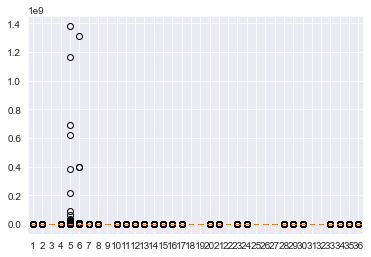

In [43]:
# Creating plot
plt.boxplot(df)

In [44]:
X=df.drop(labels=['dst_host_rerror_rate'], axis=1)
y=df['dst_host_rerror_rate'].values

In [45]:
X,y= scale(X),y

In [46]:
X.shape

(147907, 35)

In [47]:
y

array([0, 0, 1, ..., 0, 1, 5], dtype=int64)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
results=[]

# Support vector machine

In [50]:
svm = SVC(kernel = 'linear', C = 1, gamma = 1)

In [51]:
svm.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [52]:
y_pred = svm.predict(X_test)

In [53]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.9705226151037794


In [54]:
#normal' : 0, 'DOS' : 1, 'R2L' : 2, 'U2R' : 3, 'PROBE' : 4, 'extra new attacks' : 5
print(confusion_matrix(y_test, y_pred))

[[14929   136    41     1   148    54]
 [  124 10142     6     0    34    13]
 [   15     2   646     0     7     4]
 [    0     1     7     4     0     0]
 [   90     8     4     0  2405     3]
 [   57    12    26     2    77   584]]


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15309
           1       0.98      0.98      0.98     10319
           2       0.88      0.96      0.92       674
           3       0.57      0.33      0.42        12
           4       0.90      0.96      0.93      2510
           5       0.89      0.77      0.82       758

    accuracy                           0.97     29582
   macro avg       0.87      0.83      0.84     29582
weighted avg       0.97      0.97      0.97     29582



# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rclf = RandomForestClassifier(n_estimators=100)  
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred))

[[15304     2     1     1     0     1]
 [    2 10315     0     0     2     0]
 [    6     0   663     2     1     2]
 [    3     0     1     8     0     0]
 [    1     0     0     0  2504     5]
 [    1     0     3     2    23   729]]


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15309
           1       1.00      1.00      1.00     10319
           2       0.99      0.98      0.99       674
           3       0.62      0.67      0.64        12
           4       0.99      1.00      0.99      2510
           5       0.99      0.96      0.98       758

    accuracy                           1.00     29582
   macro avg       0.93      0.93      0.93     29582
weighted avg       1.00      1.00      1.00     29582



In [60]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.9980055439118383


Decision Tree Classifier

In [61]:
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [62]:
print(confusion_matrix(y_test, y_pred))

[[15274     6    13     1     8     7]
 [    8 10304     0     0     6     1]
 [   11     0   655     2     2     4]
 [    3     0     1     8     0     0]
 [    5     1     2     0  2486    16]
 [    4     1     2     2    14   735]]


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15309
           1       1.00      1.00      1.00     10319
           2       0.97      0.97      0.97       674
           3       0.62      0.67      0.64        12
           4       0.99      0.99      0.99      2510
           5       0.96      0.97      0.97       758

    accuracy                           1.00     29582
   macro avg       0.92      0.93      0.93     29582
weighted avg       1.00      1.00      1.00     29582



In [64]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.995943479142722


KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()  
knn .fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [66]:
print(confusion_matrix(y_test, y_pred))

[[15260     5    15     2    15    12]
 [    3 10310     0     0     3     3]
 [   14     1   651     2     3     3]
 [    3     0     2     7     0     0]
 [    8     2     5     0  2476    19]
 [    2     4     5     5    25   717]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15309
           1       1.00      1.00      1.00     10319
           2       0.96      0.97      0.96       674
           3       0.44      0.58      0.50        12
           4       0.98      0.99      0.98      2510
           5       0.95      0.95      0.95       758

    accuracy                           0.99     29582
   macro avg       0.89      0.91      0.90     29582
weighted avg       0.99      0.99      0.99     29582



In [68]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.9945575011831519


Gaussian Naive Bayes classifier

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
# training the model on training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [71]:
print(confusion_matrix(y_test, y_pred))

[[ 122 5790 3143 1216 1773 3265]
 [  10 9863  167   97  147   35]
 [   1   73  313  226   44   17]
 [   0    0    0   11    1    0]
 [   0  193    0   14 2291   12]
 [   0  132   13   91  317  205]]


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.01      0.02     15309
           1       0.61      0.96      0.75     10319
           2       0.09      0.46      0.15       674
           3       0.01      0.92      0.01        12
           4       0.50      0.91      0.65      2510
           5       0.06      0.27      0.10       758

    accuracy                           0.43     29582
   macro avg       0.36      0.59      0.28     29582
weighted avg       0.74      0.43      0.33     29582



In [73]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.43286457981204784


In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [75]:
print(confusion_matrix(y_test, y_pred))

[[15302     2     2     1     2     0]
 [    0 10317     0     0     2     0]
 [    4     1   666     2     0     1]
 [    0     0     1    11     0     0]
 [    2     0     0     0  2502     6]
 [    1     0     1     1    16   739]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15309
           1       1.00      1.00      1.00     10319
           2       0.99      0.99      0.99       674
           3       0.73      0.92      0.81        12
           4       0.99      1.00      0.99      2510
           5       0.99      0.97      0.98       758

    accuracy                           1.00     29582
   macro avg       0.95      0.98      0.96     29582
weighted avg       1.00      1.00      1.00     29582



In [77]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.9984788046785207


In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\anude\anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print(confusion_matrix(y_test, y_pred))

[[14888   157    44     1   145    74]
 [  136 10073    19     0    59    32]
 [   74    16   566     0    10     8]
 [    0     0     6     5     0     1]
 [  127    29     2     0  2315    37]
 [   75    41    35     2    77   528]]


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15309
           1       0.98      0.98      0.98     10319
           2       0.84      0.84      0.84       674
           3       0.62      0.42      0.50        12
           4       0.89      0.92      0.91      2510
           5       0.78      0.70      0.73       758

    accuracy                           0.96     29582
   macro avg       0.85      0.80      0.82     29582
weighted avg       0.96      0.96      0.96     29582



In [82]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.959198161043878


In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

In [85]:
print(confusion_matrix(y_test, y_pred))

[[15261     3    21     1    14     9]
 [    3 10311     0     0     4     1]
 [    8     1   656     2     6     1]
 [    1     0     4     6     1     0]
 [    3     2     4     0  2493     8]
 [    1     2     3     4    51   697]]


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15309
           1       1.00      1.00      1.00     10319
           2       0.95      0.97      0.96       674
           3       0.46      0.50      0.48        12
           4       0.97      0.99      0.98      2510
           5       0.97      0.92      0.95       758

    accuracy                           0.99     29582
   macro avg       0.89      0.90      0.89     29582
weighted avg       0.99      0.99      0.99     29582



In [87]:
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)

Accuracy: 0.9946589142045839


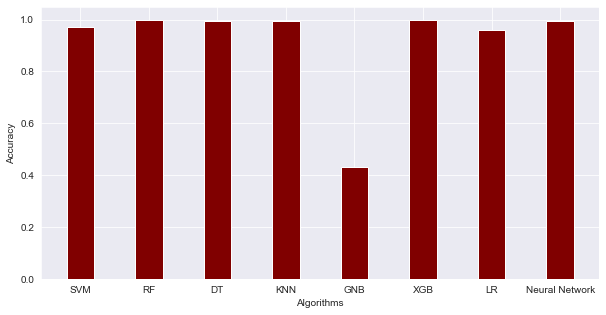

In [88]:
algorithms =['SVM','RF','DT','KNN','GNB','XGB','LR','Neural Network']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithms,results, color ='maroon', width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [3]:
features_list = ['train_duration', 'train_protocol_type', 'train_service',
       'train_flag', 'src_bytes', 'dst_bytes', 'land', 'hot', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate','dst_bushost_srv_rerror_rate']

features_dict=dict()

i=0
for feature in features_list:
    features_dict.update({'f'+str(i):feature})
    i=i+1
#====================================================================
feature_important = xgb.get_booster().get_score(importance_type='weight')
important_keys = list(feature_important.keys())
keys=[]
values = list(feature_important.values())

for key in important_keys:
    keys.append(features_dict[key])

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(35, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 12 important features

NameError: name 'xgb' is not defined